# How to work with distributions



In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
# Color Palette
pal='rainbow'
sns.set_palette(pal)
sns.color_palette(pal)

[(0.21764705882352942, 0.42912060877260894, 0.9755119679804366),
 (0.0725490196078431, 0.7829276104921027, 0.9005867023006374),
 (0.3549019607843137, 0.9741386021045101, 0.7829276104921028),
 (0.6450980392156862, 0.9741386021045102, 0.622112816721474),
 (0.9274509803921569, 0.7829276104921029, 0.43467642176596505),
 (1.0, 0.4291206087726091, 0.2199463578396687)]

In [245]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
X = df.copy()

features = df.columns.to_list()

df['target'] = data['target']
y = df['target'].copy()

df.describe().T.style.bar()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000
target,150.000000,1.000000,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


In [246]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 1) Visualization


### Simple

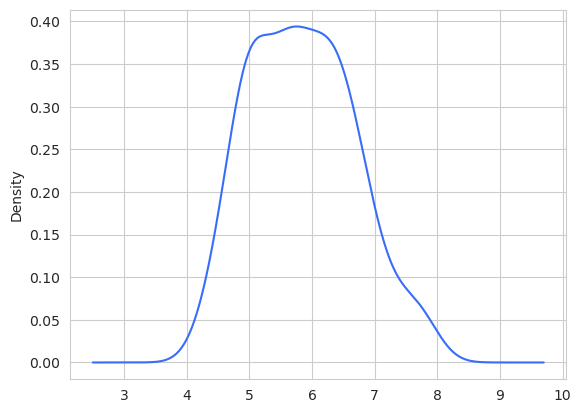

In [222]:
X[features[0]].plot.kde();

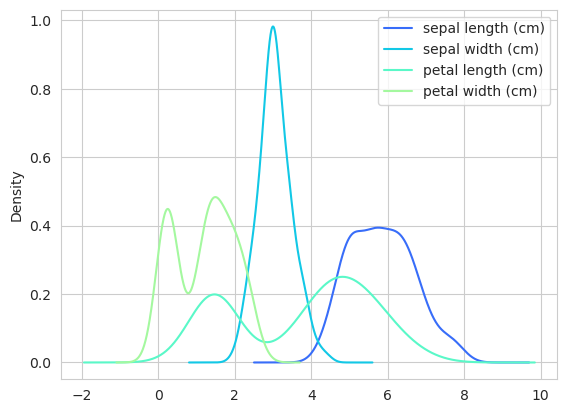

In [223]:
# Line
for feature in features:
    X[feature].plot.kde(label=feature)
plt.legend()
plt.show()

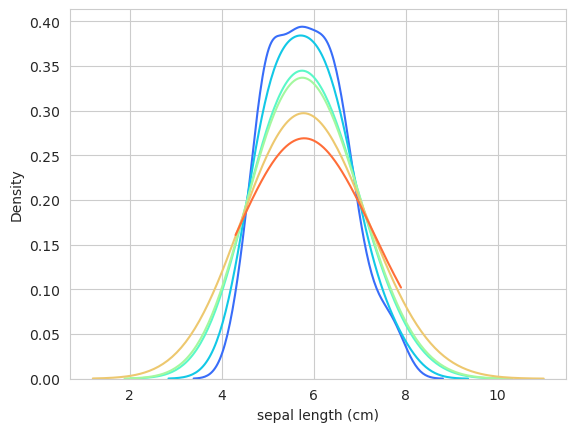

In [224]:
# Smoothing bandwidth
sns.kdeplot(data=X, x=features[0]);
sns.kdeplot(data=X, x=features[0], bw_adjust=1.6);
sns.kdeplot(data=X, x=features[0], bw_adjust=2.5); # Scott (default)
sns.kdeplot(data=X, x=features[0], bw_adjust=2.5, bw_method='silverman'); # Silverman
sns.kdeplot(data=X, x=features[0], bw_adjust=2.5, bw_method=0.5); # Scalar
sns.kdeplot(data=X, x=features[0], bw_adjust=4, cut=0); # Cut point

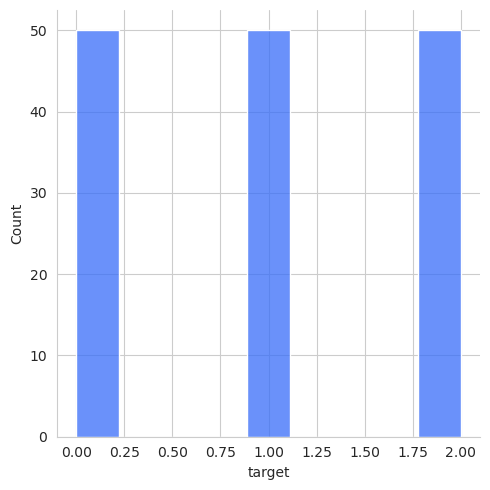

In [225]:
# For small data, like classes
sns.displot(data=df, x="target");

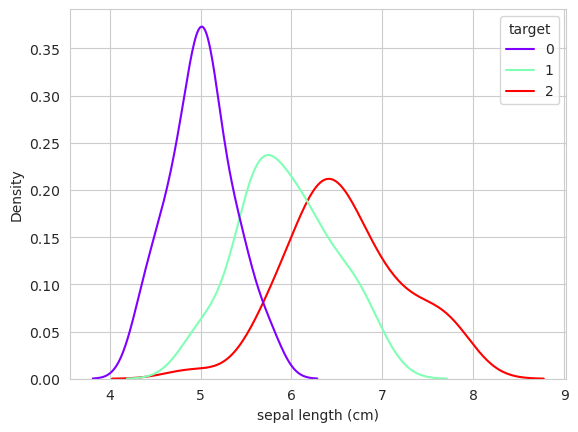

In [226]:
# multiclass distributions
sns.kdeplot(data=X, x=features[0], hue=y, palette=pal);

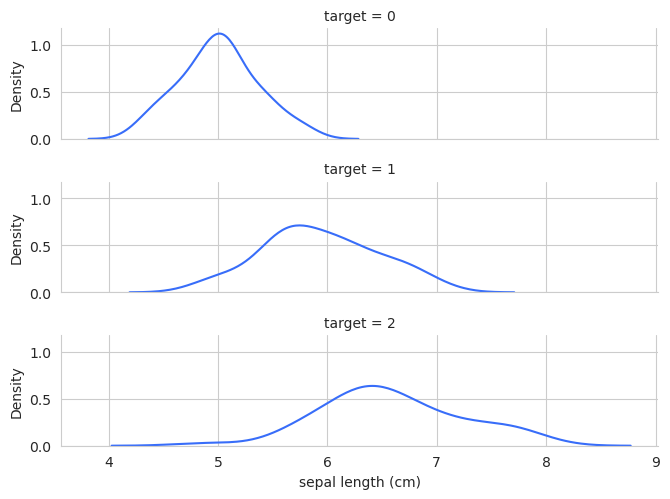

In [227]:
# separate multiclass distribution
g = sns.FacetGrid(data=df, row='target', height=1.7, aspect=4)
g.map(sns.kdeplot, features[0]);

<AxesSubplot: xlabel='sepal length (cm)', ylabel='Density'>

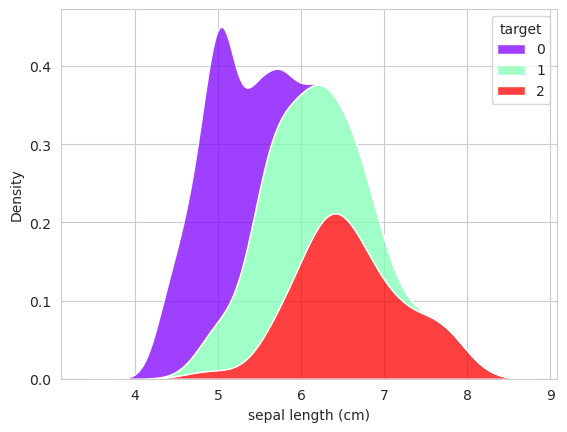

In [228]:
# Multiclass stacked target
sns.kdeplot(data=X, x=features[0], hue=y, multiple="stack", palette=pal)

<AxesSubplot: xlabel='sepal length (cm)', ylabel='Density'>

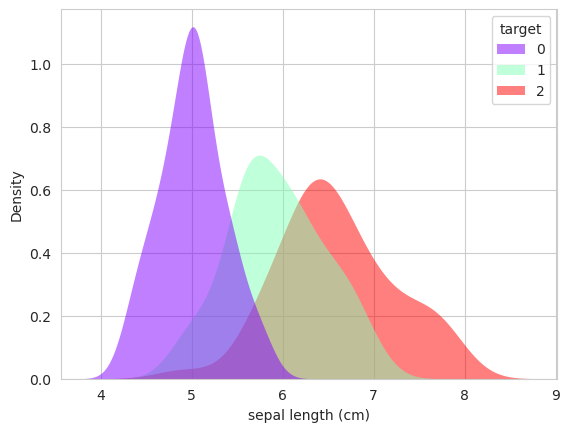

In [229]:
# Transparency/alpha
sns.kdeplot(
   data=df, x=features[0], hue=y,
   fill=True, common_norm=False, palette=pal,
   alpha=.5, linewidth=0,
)

### Complex

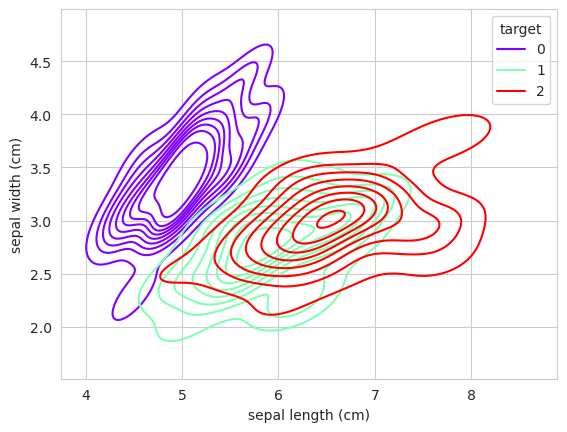

In [230]:
# For visualizing class separability
sns.kdeplot(data=df, x=features[0], y=features[1], hue="target", palette=pal);

<AxesSubplot: xlabel='target', ylabel='sepal length (cm)'>

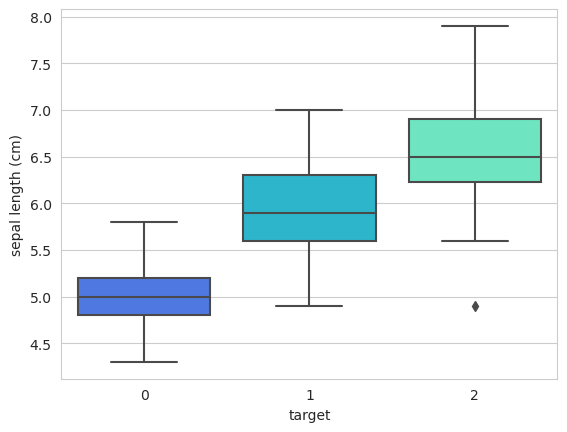

In [238]:
# Univariate analysis
sns.boxplot(df, x=y, y=features[0])

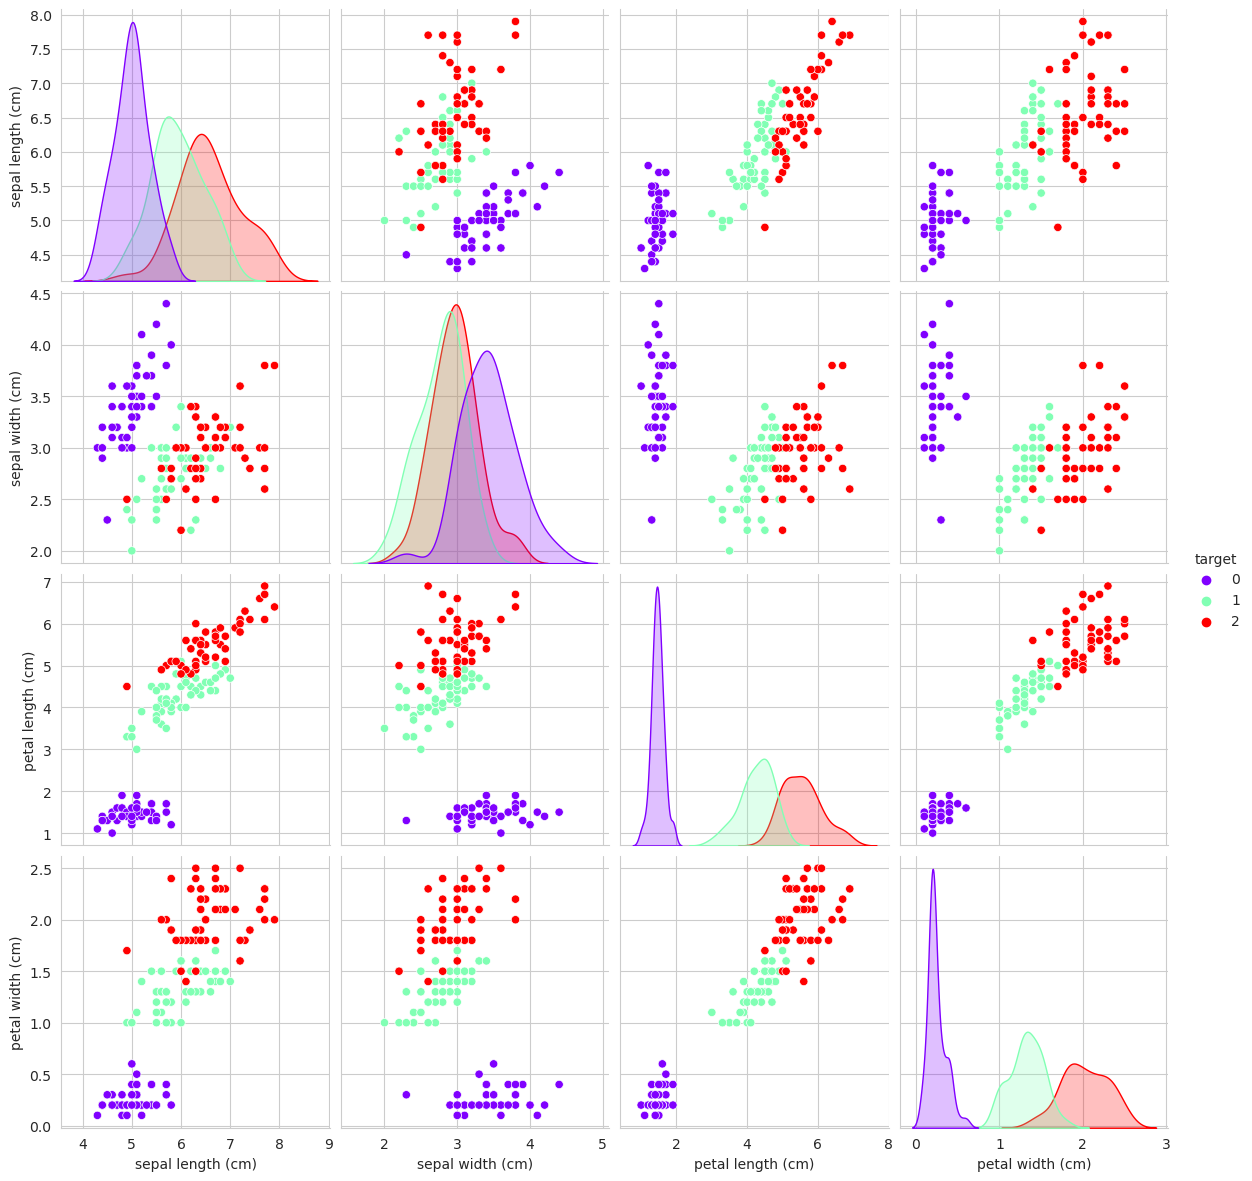

In [232]:
# n x n class separability plots
sns.set_style("whitegrid");
sns.pairplot(data=df, hue="target", height=3, palette=pal);
plt.show()

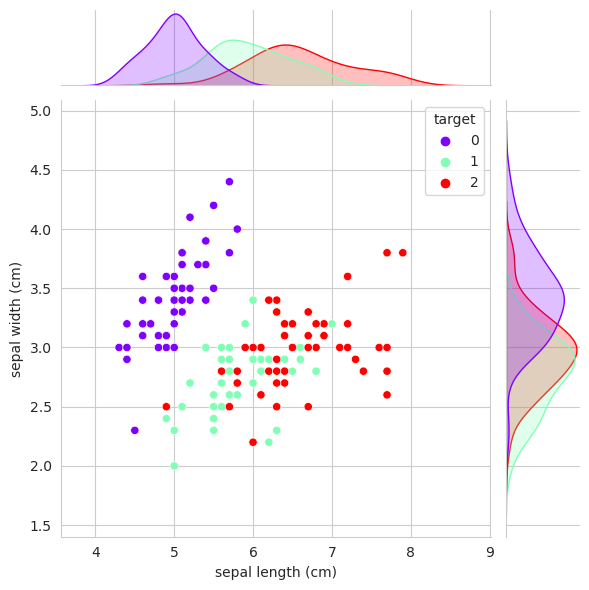

In [233]:
# Distributions on axis
sns.jointplot(data=df, x=features[0], y=features[1], hue="target", palette=pal)

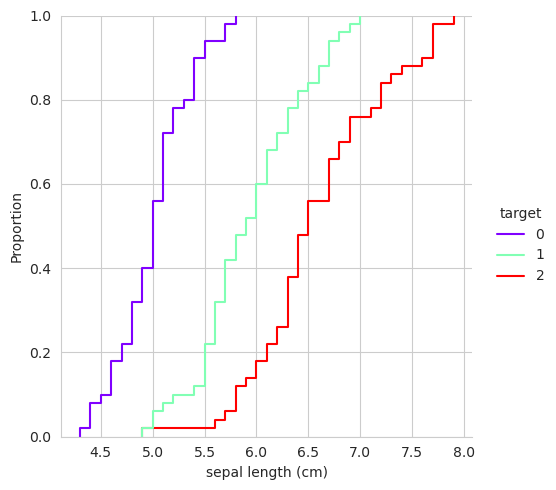

In [234]:
# ecdf directly represents datapoints, monotically
sns.displot(df, x=features[0], hue=y, kind="ecdf", palette=pal);

/tmp/ipykernel_93771/2116251714.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


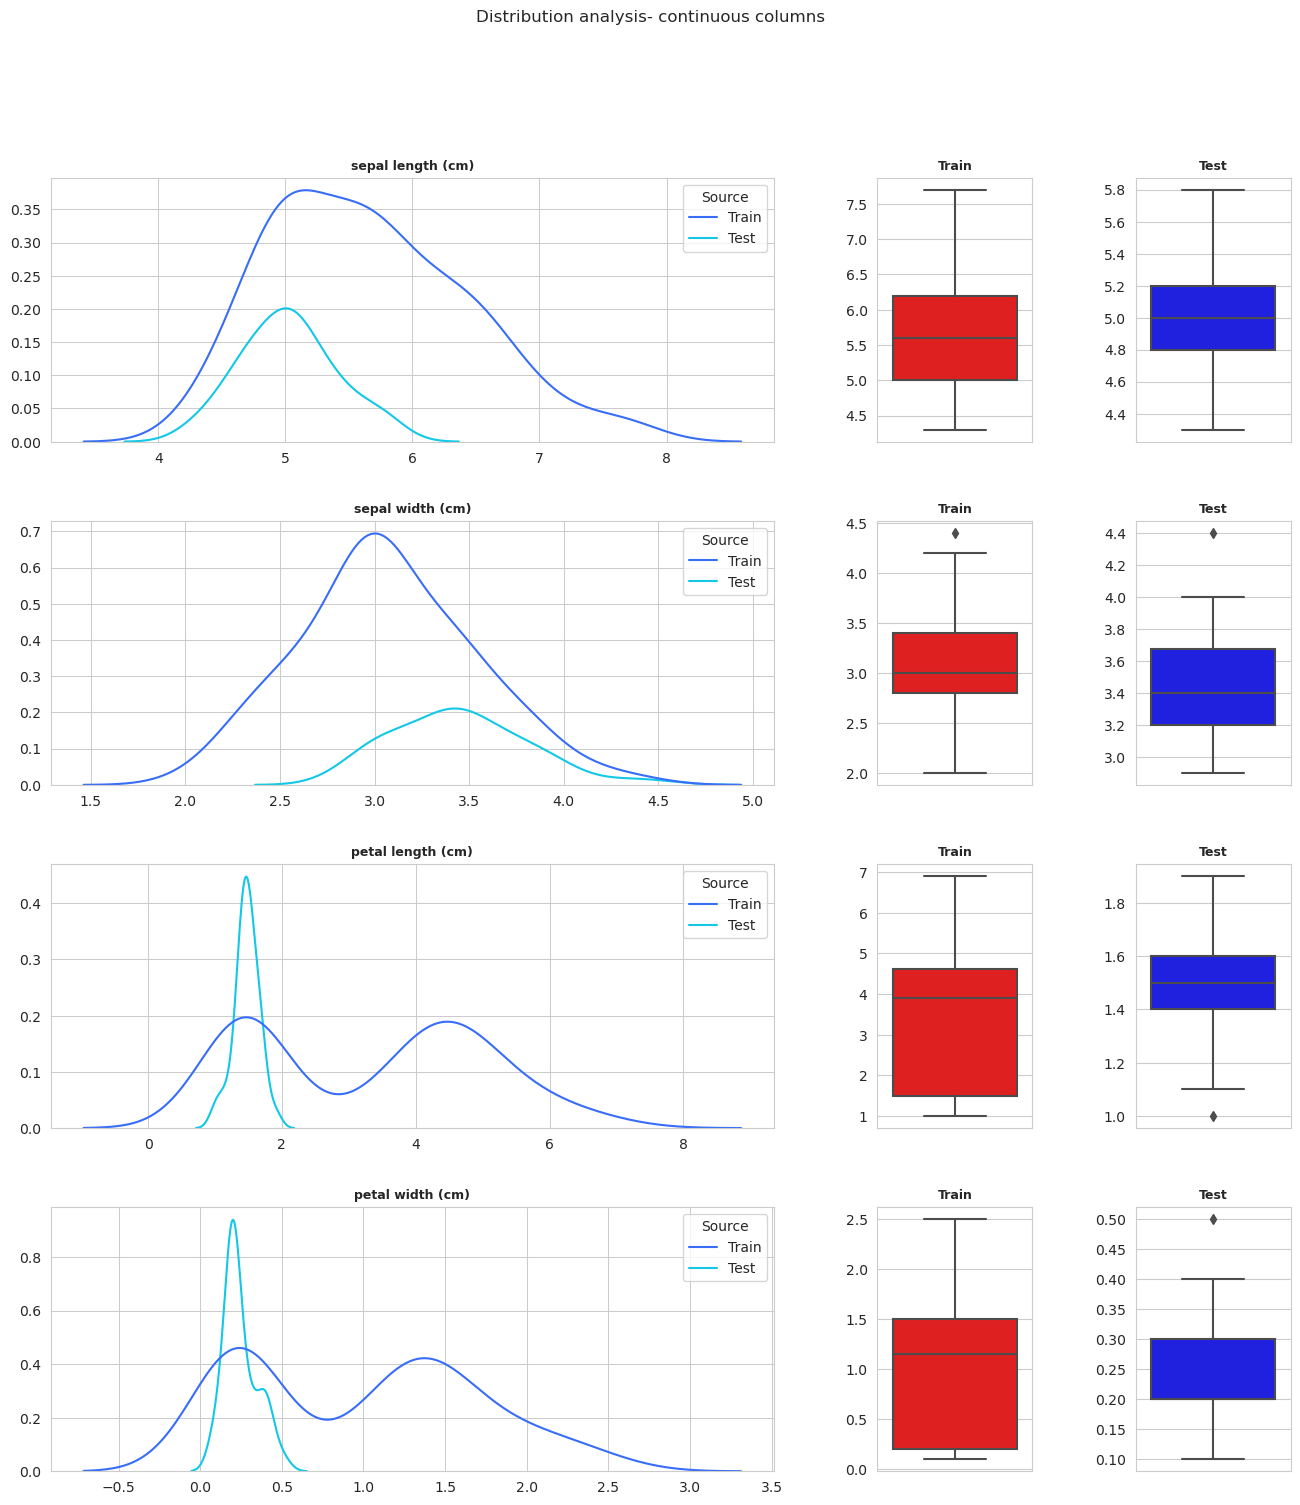

In [270]:
def plot_dist(train, test):
    num = train.columns.tolist()[:-1] # minus target
    df = pd.concat([train[num].assign(Source = 'Train'), test[num].assign(Source = 'Test')], axis=0, ignore_index = True);

    fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4.2), gridspec_kw = {'hspace': 0.3, 'wspace': 0.3, 'width_ratios': [0.70, 0.15, 0.15]});

    for i,col in enumerate(num):
        ax = axes[i,0];
        sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', ax = ax);
        ax.set_title(f"\n{col}",fontsize = 9, fontweight= 'bold');
        ax.grid(visible=True, which = 'both', linewidth = 0.75);
        ax.set(xlabel = '', ylabel = '');

        ax = axes[i,1];
        sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, ax = ax, color='red');
        ax.set(xlabel = '', ylabel = '');
        ax.set_title(f"Train",fontsize = 9, fontweight= 'bold');

        ax = axes[i,2];
        sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, ax = ax, color='blue'); 
        ax.set(xlabel = '', ylabel = '');
        ax.set_title(f"Test",fontsize = 9, fontweight= 'bold');


    plt.suptitle(f"Distribution analysis- continuous columns");
    plt.tight_layout();
    plt.show();

data_len = df.shape[0]
split = int(data_len * 0.2)
train = df[:-split].copy()
test = df[:split].copy()
plot_dist(train, test)


## 2) Transformation

### Log

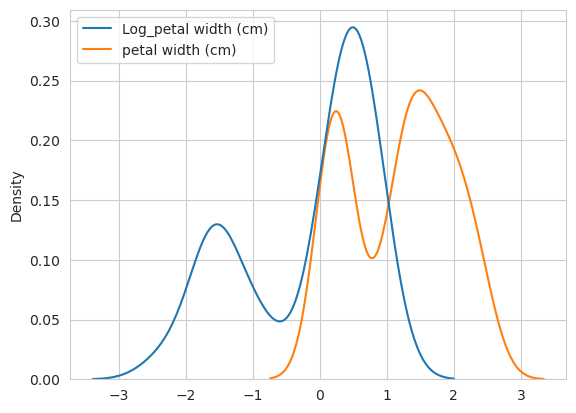

In [306]:
a =  df.copy()
f_name = 'Log_' + features[3]
a[f_name] = np.log(a[features[3]])
a = a.filter(items=[f_name, features[3]])
sns.kdeplot(data=a, palette='tab10');

### Boxcox

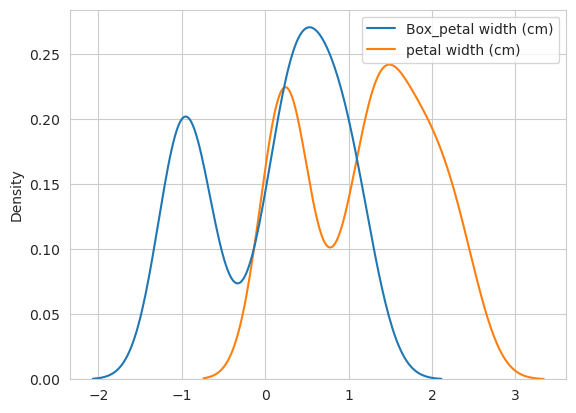

In [309]:
from scipy.stats import boxcox
a =  df.copy()
f_name = 'Box_' + features[3]
transformed_df, lambda_value = boxcox(a[features[3]])

a[f_name] = transformed_df

a = a.filter(items=[f_name, features[3]])

sns.kdeplot(data=a, palette='tab10');

### Yeojohnson

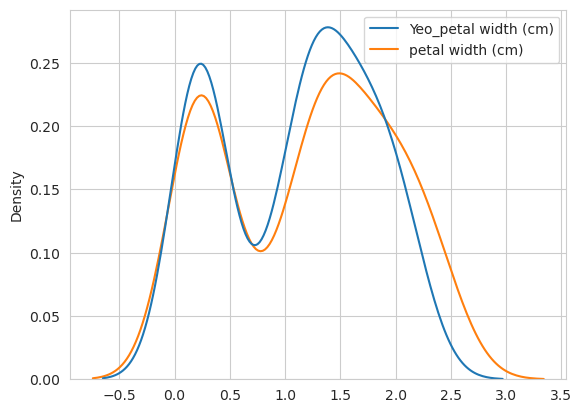

In [311]:
from scipy.stats import yeojohnson
a =  df.copy()
f_name = 'Yeo_' + features[3]
transformed_df, lambda_value = yeojohnson(a[features[3]])

a[f_name] = transformed_df

a = a.filter(items=[f_name, features[3]])

sns.kdeplot(data=a, palette='tab10');

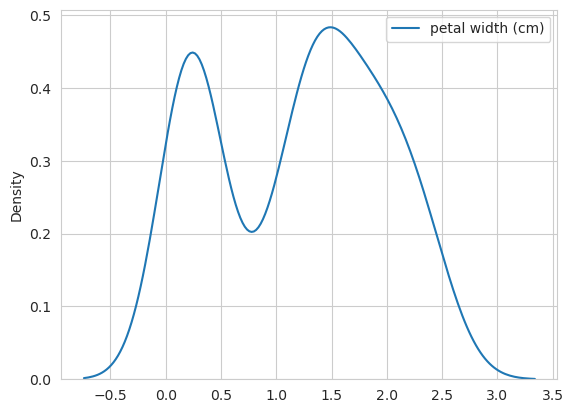

In [319]:

from sklearn.naive_bayes import GaussianNB
a =  df.copy()
f_name = 'Gauss_' + features[3]

a = a.filter(items=[features[3]])

model = GaussianNB()

# Fit the model to the data
model.fit(a, y)

# Transform the data
transformed_numbers = model.predict_proba(a)

a[f_name] = transformed_df


sns.kdeplot(data=a, palette='tab10');